In [ ]:
# NMist handwritten digits
# Number of inputs: 28x28 = 784 (number of pixels)
# Number of outputs: 10

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('sample_data/mnist_train_small.csv')

In [ ]:
df

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: using a fixed width font, reshape the first row of df into a 28x28 ascii art. Ignore the first column called '6'

import pandas as pd

# Assuming the first row is at index 0
first_row = df.iloc[0, 1:]  # Exclude the first column (label)

# Reshape the row into a 28x28 matrix
image_matrix = first_row.values.reshape(28, 28)

# Define characters for different intensity levels (adjust as needed)
chars = " .:-=+*#%@"

# Print the ASCII art
for row in image_matrix:
  for pixel in row:
    intensity = int(pixel / 255 * (len(chars) - 1)) # Normalize to character range
    print(chars[intensity], end="")
  print()


                            
                            
                            
                            
                            
            :.    .=*%#     
         -#%%%#%##%%%*      
        -%%%******#*:       
        .%%-                
        +%+                 
        %@. ..              
       -%%*#%%#-            
       *%%%#**%%%-          
       +%#:    *%%=         
        .       :#%*        
                  #@=       
                  -%*       
                  .%*       
                  +%*       
       .*.       -%%=       
       =%.      =%%=        
       %+     :#%%+         
       %*:.::*%%%-          
       .#%%%%%%*.           
         =+*+=:             
                            
                            
                            


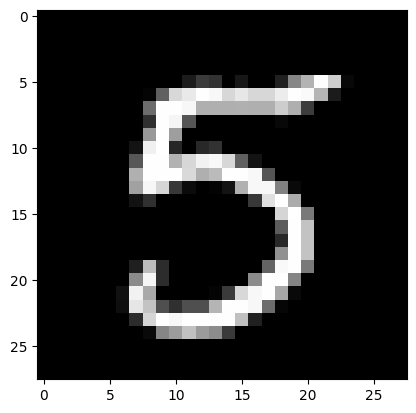

In [ ]:
# prompt: display data from row 1 of df as an image. Don't use the first column

import matplotlib.pyplot as plt

# Assuming the first row is at index 0
first_row = df.iloc[0, 1:]  # Exclude the first column (label)

# Reshape the row into a 28x28 matrix
image_matrix = first_row.values.reshape(28, 28)

# Display the image using matplotlib
plt.imshow(image_matrix, cmap='gray')
plt.show()


In [ ]:
X = df.drop('6', axis=1)
y = pd.get_dummies(df['6'])

In [ ]:
# prompt: train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf

# model 1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=4, activation='relu',input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,190 (12.46 KB)

 Trainable params: 3,190 (12.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# model 2
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu',input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=64, activation='relu',input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# model 3 - use dropout layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu',input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=64, activation='relu',input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3536 - loss: 13.1044
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5786 - loss: 1.2567
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6604 - loss: 0.8981
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7176 - loss: 0.7449
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7193 - loss: 0.6321
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7230 - loss: 0.5786
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7332 - loss: 0.5174
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7340 - loss: 0.4619
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7154 - loss: 0.4111
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7249 - loss: 0.3907
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7238 - loss: 0.3630
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/ste

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


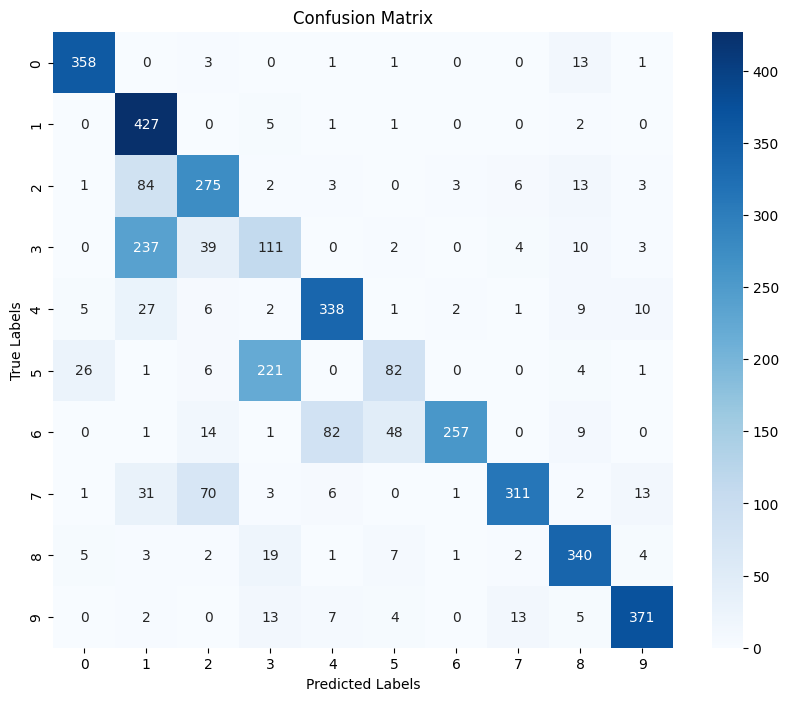

In [ ]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test.values, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
